In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

from nltk import tokenize

from source.Topic.Utils import *
from source.Topic.Model import *
import re

Using TensorFlow backend.


In [2]:
#meta = pd.read_csv("metadata.csv")
meta = pd.read_csv("demo_text_chunk_0.csv", sep=";")

In [3]:
meta["publish_time"] = pd.to_datetime(meta["publish_time"])
meta["publish_year"] = (pd.DatetimeIndex(meta['publish_time']).year)
meta["publish_month"] = (pd.DatetimeIndex(meta['publish_time']).month)
meta = meta[meta["publish_year"] == 2020]
print(meta.shape[0], " papers are available after 2020 Jan 1.")

KeyError: 'publish_time'

In [19]:
sentences = []
sentence_to_summary = {}
for i, body in enumerate(meta.body):
    for sentence in tokenize.sent_tokenize(body, language="german"):
        sentences.append(sentence.replace("-", " ").replace("   ", " - "))
        sentence_to_summary[sentences.__len__() - 1] = i

In [3]:
documents = meta.iloc[:, 0]
documents=documents.reset_index()
documents.drop("index", inplace = True, axis = 1)

##create pandas data frame with all abstracts, use as input corpus
documents["index"] = documents.index.values
documents.head(3)

,body,index
0,"Die Deutschen gelten als Aktienmuffel, daran ä...",0
1,Für manche Beschäftigte ist es jedes Jahr ein ...,1
2,Als sich die Thyssenkrupp-Eigner Anfang des Ja...,2


In [31]:
method = "LDA_BERT"
samp_size = sentences.__len__()
ntopic = 15

# parser = argparse.ArgumentParser(description='contextual_topic_identification tm_test:1.0')

# parser.add_argument('--fpath', default='/kaggle/working/train.csv')
# parser.add_argument('--ntopic', default=10,)
# parser.add_argument('--method', default='TFIDF')
# parser.add_argument('--samp_size', default=20500)

# args = parser.parse_args()

#data = documents  # pd.read_csv('/kaggle/working/train.csv')
#data = data.fillna('')  # only the comments has NaN's
#rws = data.body
rws = pd.Series(sentences)
sentences, token_lists, idx_in = preprocess(rws, samp_size=samp_size)
# Define the topic model object
# tm = Topic_Model(k = 10), method = TFIDF)

Preprocessing raw texts ...
Preprocessing raw texts. Done!


In [32]:
tm = Topic_Model(k=ntopic, method=method)
# Fit the topic model by chosen method
tm.fit(sentences, token_lists)
# Evaluate using metrics
#with open("/kaggle/working/{}.file".format(tm.id), "wb") as f:
#    pickle.dump(tm, f, pickle.HIGHEST_PROTOCOL)

Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...

Getting vector representations for BERT. Done!
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!


In [33]:
print('Coherence:', get_coherence(tm, token_lists, 'c_v'))
print('Silhouette Score:', get_silhouette(tm))
# visualize and save img

Coherence: 0.33708821386992294
Silhouette Score: 0.4698846


Calculating UMAP projection ...
Calculating UMAP projection. Done!
Getting wordcloud for topic 0 ...
Getting wordcloud for topic 0. Done!
Getting wordcloud for topic 1 ...
Getting wordcloud for topic 1. Done!
Getting wordcloud for topic 2 ...
Getting wordcloud for topic 2. Done!
Getting wordcloud for topic 3 ...
Getting wordcloud for topic 3. Done!
Getting wordcloud for topic 4 ...
Getting wordcloud for topic 4. Done!
Getting wordcloud for topic 5 ...
Getting wordcloud for topic 5. Done!
Getting wordcloud for topic 6 ...
Getting wordcloud for topic 6. Done!
Getting wordcloud for topic 7 ...
Getting wordcloud for topic 7. Done!
Getting wordcloud for topic 8 ...
Getting wordcloud for topic 8. Done!
Getting wordcloud for topic 9 ...
Getting wordcloud for topic 9. Done!
Getting wordcloud for topic 10 ...
Getting wordcloud for topic 10. Done!
Getting wordcloud for topic 11 ...
Getting wordcloud for topic 11. Done!
Getting wordcloud for topic 12 ...
Getting wordcloud for topic 12. Done!
Gett

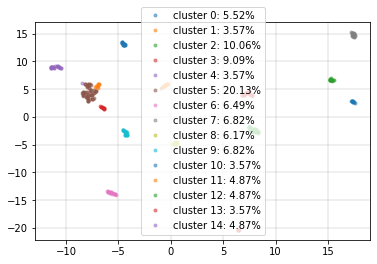

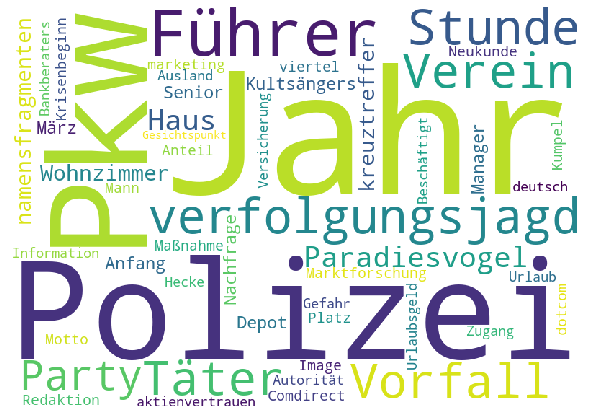

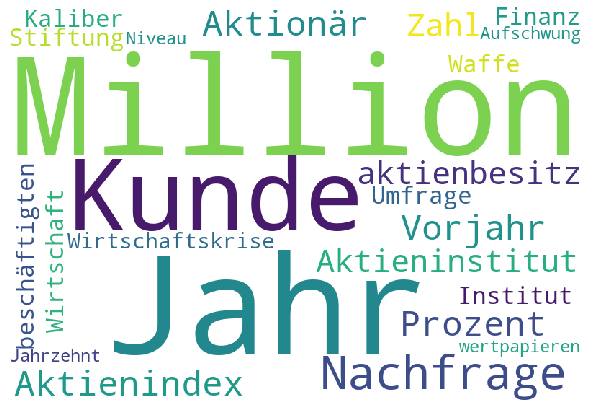

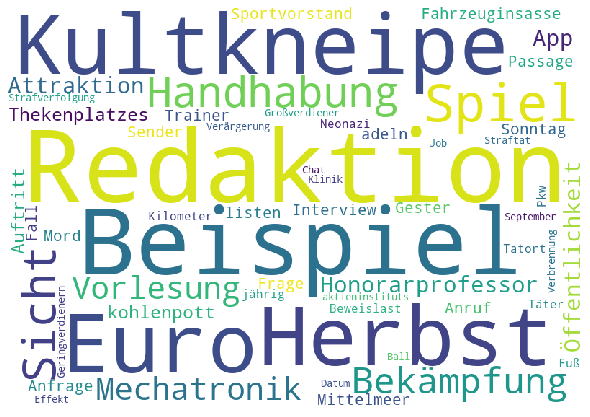

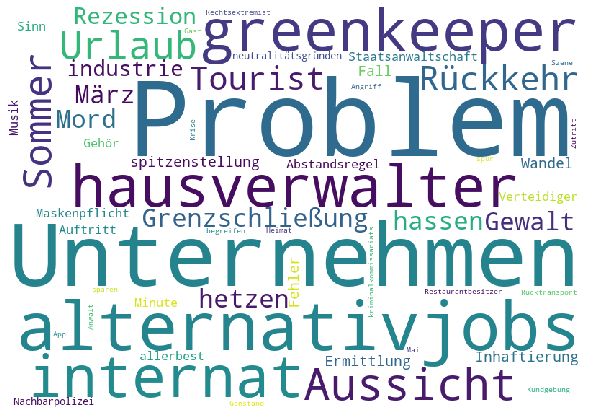

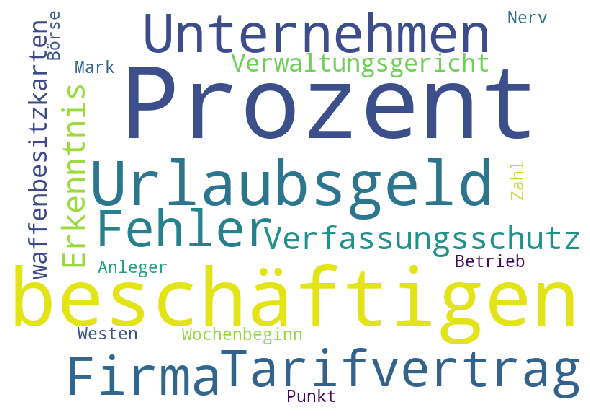

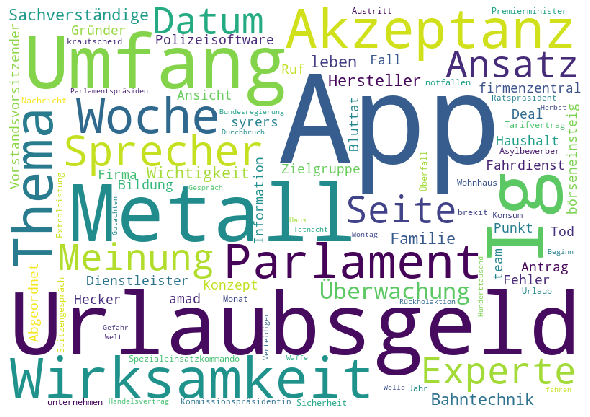

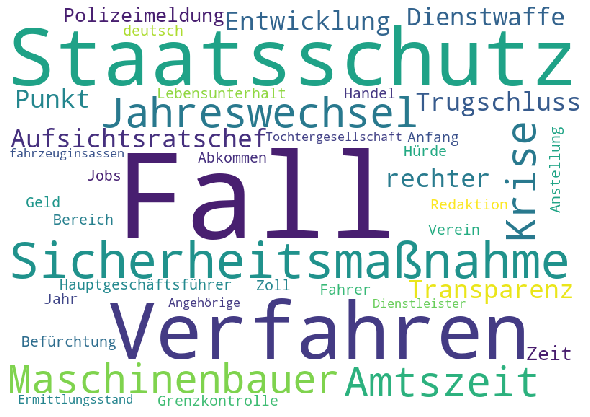

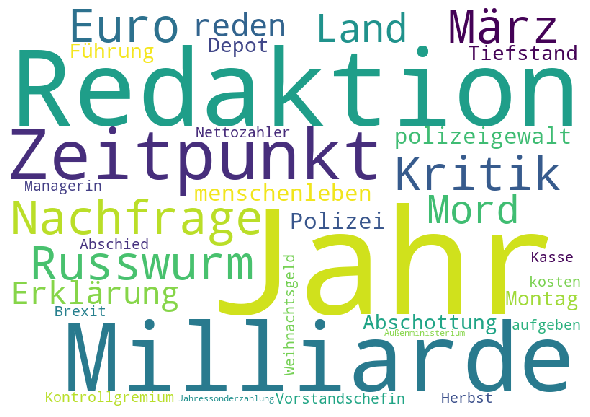

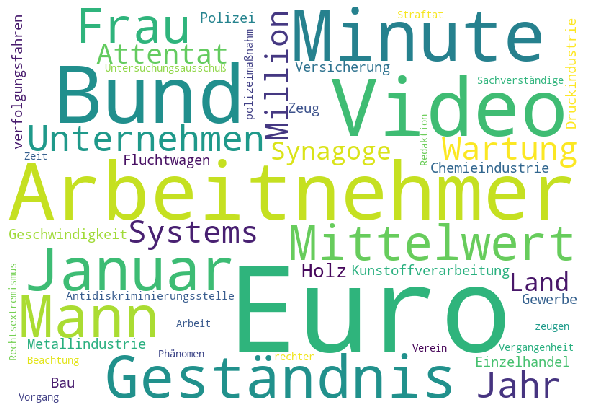

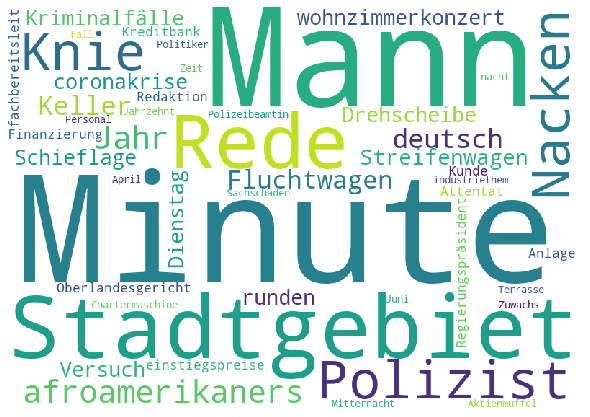

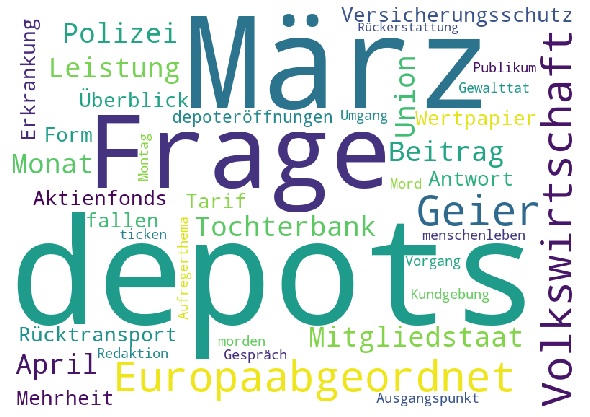

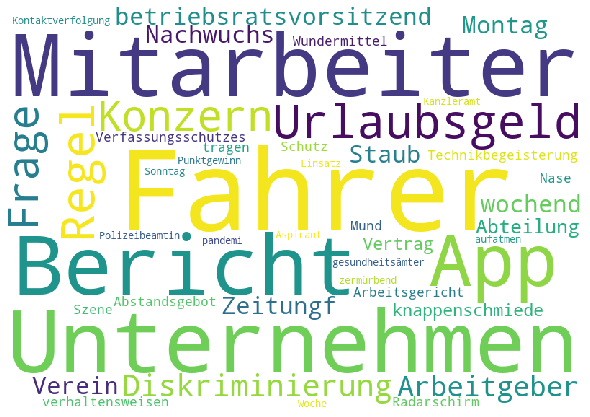

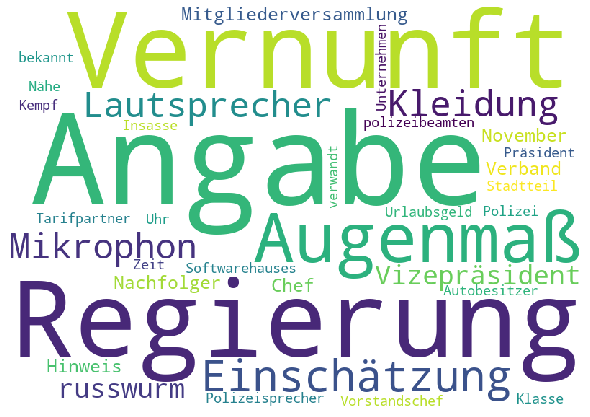

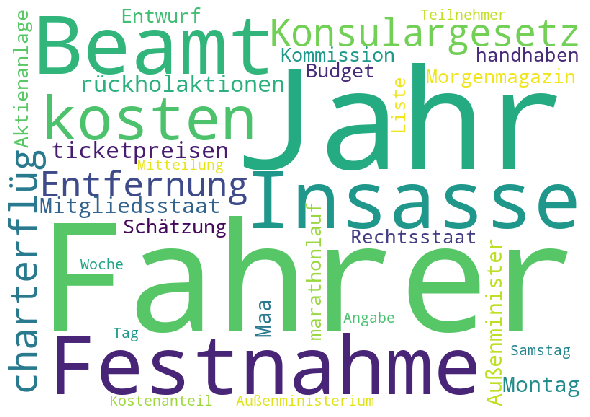

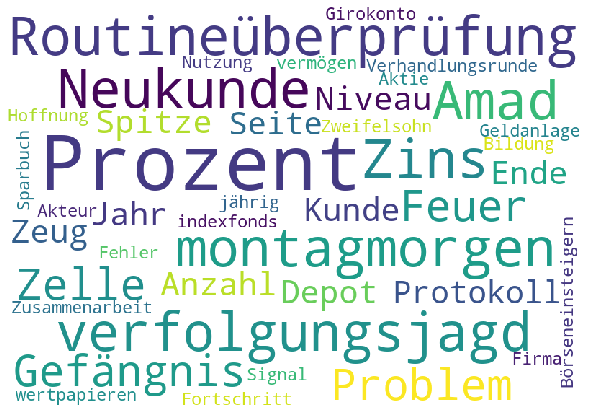

In [34]:
visualize(tm)
for i in range(tm.k):
    get_wordcloud(tm, token_lists, i)

In [25]:
tm.cluster_model.labels_

array([1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 3, 3, 0, 2, 0,
       1, 1, 3, 1, 2, 1, 3, 1, 2, 0, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 3, 3, 0, 0, 3, 0, 3, 2, 0, 1, 1, 0, 0, 1, 2, 3, 0, 1, 1, 2,
       3, 0, 3, 0, 3, 3, 0, 2, 0, 2, 2, 1, 2, 3, 1, 0, 2, 2, 0, 2, 2, 2,
       3, 1, 1, 1, 0, 2, 2, 1, 0, 3, 2, 0, 2, 0, 1, 3, 3, 0, 1, 1, 1, 0,
       0, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 3, 2, 0, 1, 0, 1,
       3, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 3, 3, 2, 0,
       0, 1, 3, 0, 0, 2, 1, 3, 3, 0, 2, 2, 2, 1, 0, 3, 1, 1, 0, 2, 3, 1,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 3, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 3, 2, 0, 0, 0, 2, 3, 3, 0, 2, 2, 1, 0, 1, 2,
       0, 3, 1, 0, 1, 2, 3, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 3,
       3, 1, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 2, 3, 1, 0, 3, 1, 3, 0, 0, 2,
       3, 1, 2, 0, 0, 3, 0, 3, 3, 2, 1, 3, 1, 1, 0, 2, 3, 0, 1, 3, 2, 3,
       0, 2, 0, 1, 3, 0, 3, 2, 1, 0, 0, 1, 0])

In [22]:
clusters = [[] for _ in range(ntopic)]
for text_i, cluster in enumerate(tm.cluster_model.labels_):
    clusters[cluster].append(meta.headline[text_i])
clusters

In [35]:
clusters = [[] for _ in range(ntopic)]
for i, cluster in enumerate(tm.cluster_model.labels_):
    clusters[cluster].append(sentence_to_summary[i])

In [36]:
for i in clusters:
    print(i)

[0, 0, 0, 1, 1, 2, 2, 2, 3, 4, 6, 6, 7, 8, 9, 10, 11]
[0, 0, 1, 1, 2, 3, 4, 5, 9, 9, 11]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 6, 6, 6, 7, 7, 9, 9, 9, 10, 10, 11, 11, 11]
[0, 0, 0, 0, 0, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 7, 9, 10, 10, 10, 11, 11, 11]
[0, 0, 2, 2, 5, 6, 8, 8, 9, 9, 11]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 4, 5, 5, 8, 8, 10, 10, 11]
[0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 4, 5, 5, 6, 6, 6, 6, 8, 9, 9]
[0, 0, 1, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 9, 10, 10, 10, 10, 11]
[0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 4, 4, 5, 7, 9, 9, 9, 9, 10, 11, 11]
[0, 0, 0, 0, 1, 2, 3, 3, 6, 7, 7]
[0, 0, 0, 1, 2, 3, 3, 4, 4, 5, 6, 7, 7, 9, 11]
[0, 0, 0, 0, 1, 4, 6, 6, 7, 8, 9, 10, 10, 11, 11]
[0, 0, 1, 4, 4, 4, 5, 6, 9, 9, 11]
[0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 5, 6, 9, 10, 11]


In [30]:
print(tm.cluster_model.labels_[0:60])
#print(tm.cluster_model.labels_[60:86])
#print(tm.cluster_model.labels_[86:105])
#sentence_to_summary

[1 1 0 1 1 1 2 2 1 0 1 1 0 1 1 2 1 3 3 0 2 0 1 1 3 1 2 1 3 1 2 0 0 3 1 2 1
 0 1 1 1 1 0 0 0 1 3 3 0 0 3 0 3 2 0 1 1 0 0 1]
